Alunos: Rafael Mascarenhas Brown de Andrade RA 22304454 e ; Tiago de Oliveira Teixeira RA 22303612

https://www.kaggle.com/datasets/saurabhshahane/data-science-jobs-salaries/code

#Preparação de Dados:


##Carregar o arquivo CSV:

In [ ]:
# Importando a biblioteca para manipulação de arquivos CSV.
import csv

# Importando a biblioteca pandas para manipulação e análise de dados.
import pandas as pd

# Importando o módulo offline da biblioteca Plotly para criação de gráficos interativos.
import plotly.offline as py

# Importando a biblioteca Seaborn para visualização de dados estatísticos.
import seaborn as sns

# Importando o módulo express da biblioteca Plotly para criação rápida de gráficos interativos.
import plotly.express as px

# Importando o módulo graph_objs da biblioteca Plotly para controle mais detalhado sobre a construção de gráficos.
import plotly.graph_objs as go

# Importando a biblioteca NumPy para operações matemáticas e manipulação de arrays.
import numpy as np

# Importando a biblioteca Matplotlib para geração de gráficos estáticos.
import matplotlib.pyplot as plt

# Importando a função drive do módulo google.colab para manipulação de arquivos no ambiente do Colab.
from google.colab import drive

# Importando a biblioteca NetworkX para manipulação e análise de estruturas de redes (grafos).
import networkx as nx


github link

In [ ]:
# URL do conjunto de dados CSV a ser lido.
url = "https://raw.githubusercontent.com/Tiagoot/TrabalhoEstruturaDeDados/df275d3f3a62a8d3b03d6a38baa03fc0d7d25398/Data%20Science%20Jobs%20Salaries.csv"

# Utilizando o Pandas para ler o conjunto de dados CSV da URL e armazená-lo em um DataFrame chamado 'serie'.
serie = pd.read_csv(url)

# Exibindo as primeiras linhas do DataFrame para inspecionar os dados.
print(serie.head())

  work_year experience_level employment_type                  job_title  \
0     2021e               EN              FT    Data Science Consultant   
1      2020               SE              FT             Data Scientist   
2     2021e               EX              FT       Head of Data Science   
3     2021e               EX              FT               Head of Data   
4     2021e               EN              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   54000             EUR          64369                 DE            50   
1   60000             EUR          68428                 GR           100   
2   85000             USD          85000                 RU             0   
3  230000             USD         230000                 RU            50   
4  125000             USD         125000                 US           100   

  company_location company_size  
0               DE            L  
1               US

##Limpeza e Normalização dos Dados:

In [ ]:
df = pd.DataFrame(serie)

# Lista de colunas para aplicar a substituição
colunas_a_substituir = ['experience_level', 'employment_type']  # Adicione mais colunas conforme necessário

# Substituir 'EN' por 'Entry Level' em cada coluna selecionada
for coluna in colunas_a_substituir:
    df[coluna] = df[coluna].replace('EN', 'Entry-level ')
    df[coluna] = df[coluna].replace('SE', 'Senior-level')
    df[coluna] = df[coluna].replace('EX', 'Employee-exérience ')
    df[coluna] = df[coluna].replace('MI', 'Mid-level ')
# Substituir os códigos por descrições em 'employment_type'
    df['employment_type'] = df['employment_type'].replace('PT', 'Part-time ')
    df['employment_type'] = df['employment_type'].replace('FT', 'Full-time ')
    df['employment_type'] = df['employment_type'].replace('CT', 'Contract ')
    df['employment_type'] = df['employment_type'].replace('FL', 'Freelance ')
    df['work_year'] = df['work_year'].replace('2021e', '2021')
# Exibir o DataFrame modificado
df = df.fillna('Not Specified')
print(df)
serie = pd.DataFrame(df)

    work_year     experience_level employment_type                  job_title  \
0        2021         Entry-level       Full-time     Data Science Consultant   
1        2020         Senior-level      Full-time              Data Scientist   
2        2021  Employee-exérience       Full-time        Head of Data Science   
3        2021  Employee-exérience       Full-time                Head of Data   
4        2021         Entry-level       Full-time   Machine Learning Engineer   
..        ...                  ...             ...                        ...   
240      2020         Senior-level      Full-time              Data Scientist   
241      2021           Mid-level       Full-time    Principal Data Scientist   
242      2020         Entry-level       Full-time              Data Scientist   
243      2020         Entry-level        Contract       Business Data Analyst   
244      2021         Senior-level      Full-time        Data Science Manager   

      salary salary_currenc

In [ ]:
# Caminho para o arquivo de saída Excel.
caminho_saida = 'saida.xlsx'

# Salvando o DataFrame 'serie' em um arquivo Excel no caminho especificado.
# O parâmetro 'index=False' indica que o índice do DataFrame não será incluído no arquivo Excel.
serie.to_excel(caminho_saida, index=False)

# Mensagem indicando que o arquivo Excel foi gerado com sucesso.
print("Arquivo Excel gerado com sucesso.")

Arquivo Excel gerado com sucesso.


In [ ]:
# Obtendo as dimensões do DataFrame 'serie'.
num_rows, num_columns = serie.shape

# Exibindo o número de linhas no DataFrame.
print(f"Number of Rows: {num_rows}")

# Exibindo o número de colunas no DataFrame.
print(f"Number of Columns: {num_columns}")


Number of Rows: 245
Number of Columns: 11


In [ ]:
serie

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,Entry-level,Full-time,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,Senior-level,Full-time,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021,Employee-exérience,Full-time,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021,Employee-exérience,Full-time,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021,Entry-level,Full-time,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,Senior-level,Full-time,Data Scientist,412000,USD,412000,US,100,US,L
241,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
serie.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
# Removendo linhas com valores nulos do DataFrame 'serie'.
serie.dropna(inplace=True)
serie

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,Entry-level,Full-time,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,Senior-level,Full-time,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021,Employee-exérience,Full-time,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021,Employee-exérience,Full-time,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021,Entry-level,Full-time,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,Senior-level,Full-time,Data Scientist,412000,USD,412000,US,100,US,L
241,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
# Filtrando o DataFrame 'serie' para manter apenas as linhas em que tanto 'salary' quanto 'salary_in_usd' são maiores que zero.
serie = serie[(serie['salary'] > 0) & (serie['salary_in_usd'] > 0)]
serie

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,Entry-level,Full-time,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,Senior-level,Full-time,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021,Employee-exérience,Full-time,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021,Employee-exérience,Full-time,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021,Entry-level,Full-time,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,Senior-level,Full-time,Data Scientist,412000,USD,412000,US,100,US,L
241,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
print(serie)

    work_year     experience_level employment_type                  job_title  \
0        2021         Entry-level       Full-time     Data Science Consultant   
1        2020         Senior-level      Full-time              Data Scientist   
2        2021  Employee-exérience       Full-time        Head of Data Science   
3        2021  Employee-exérience       Full-time                Head of Data   
4        2021         Entry-level       Full-time   Machine Learning Engineer   
..        ...                  ...             ...                        ...   
240      2020         Senior-level      Full-time              Data Scientist   
241      2021           Mid-level       Full-time    Principal Data Scientist   
242      2020         Entry-level       Full-time              Data Scientist   
243      2020         Entry-level        Contract       Business Data Analyst   
244      2021         Senior-level      Full-time        Data Science Manager   

      salary salary_currenc

#Análise Utilizando Listas:

In [ ]:
# Agrupando o DataFrame 'serie' por níveis de experiência ('experience_level').
# Em seguida, calculando estatísticas descritivas para a coluna 'salary_in_usd' dentro de cada grupo.
serie.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
Employee-exérience,11.0,226288.000000,164029.405584,70329.0,114021.50,154963.0,280000.0,600000.0
Entry-level,54.0,59753.462963,49103.427811,4000.0,21732.25,58800.5,82500.0,250000.0
Mid-level,103.0,85738.135922,78324.468318,2876.0,40505.00,73000.0,110000.0,450000.0
Senior-level,77.0,128841.298701,67909.763752,19052.0,78340.00,120000.0,170000.0,412000.0


In [ ]:
# Agrupando o DataFrame 'serie' por tamanhos de empresas ('company_size').
# Em seguida, calculando estatísticas descritivas para a coluna 'salary_in_usd' dentro de cada grupo.
serie.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,132.0,114374.015152,90822.326575,5898.0,56183.5,91500.0,150000.0,600000.0
M,55.0,85082.818182,72504.464408,4000.0,36337.5,71968.0,116062.5,450000.0
S,58.0,80874.793103,72038.848392,2876.0,35555.5,68364.5,101951.0,416000.0


In [ ]:
# Agrupando o DataFrame 'serie' por 'company_size' e 'experience_level'.
# Calculando a média para a coluna 'salary_in_usd' dentro de cada grupo.
serie.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()

experience_level,Employee-exérience,Entry-level,Mid-level,Senior-level
company_size,,,,
L,239729.875,75148.000000,96285.451613,134465.604651
M,85000.000,41063.923077,83982.800000,122572.125000
S,243164.500,57502.000000,47610.000000,120978.055556


In [ ]:
# Agrupando o DataFrame 'serie' por 'company_size' e 'experience_level'.
# Calculando estatísticas descritivas para a coluna 'salary_in_usd' dentro de cada grupo.
serie.groupby(['company_size', 'experience_level'])['salary_in_usd'].describe()

count           mean            std  \
company_size experience_level                                           
L            Employee-exérience     8.0  239729.875000  163591.318040   
             Entry-level           19.0   75148.000000   64087.707409   
             Mid-level             62.0   96285.451613   80426.650346   
             Senior-level          43.0  134465.604651   74345.888870   
M            Employee-exérience     1.0   85000.000000            NaN   
             Entry-level           13.0   41063.923077   30822.672549   
             Mid-level             25.0   83982.800000   87827.739265   
             Senior-level          16.0  122572.125000   51404.202382   
S            Employee-exérience     2.0  243164.500000  244426.308160   
             Entry-level           22.0   57502.000000   39823.933768   
             Mid-level             16.0   47610.000000   32458.213574   
             Senior-level          18.0  120978.055556   66689.351887   

                                      min        25%       50%        75%  \
company_size experience_level                                               
L            Employee-exérience   79833.0  148260.75  192481.5  257500.00   
             Entry-level           5898.0   33730.50   64369.0   87000.00   
             Mid-level             6072.0   46851.50   82500.0  112654.00   
             Senior-level         21843.0   74147.00  135000.0  174000.00   
M            Employee-exérience   85000.0   85000.00   85000.0   85000.00   
             Entry-level           4000.0   21695.00   28475.0   65561.00   
             Mid-level             4000.0   38776.00   61985.0  111775.00   
             Senior-level         19052.0   94552.00  117062.5  166250.00   
S            Employee-exérience   70329.0  156746.75  243164.5  329582.25   
             Entry-level           6072.0   18993.75   55660.5   88750.00   
             Mid-level             2876.0   17737.25   46720.5   68300.00   
             Senior-level         33511.0   78110.75  108898.5  160000.00   

                                       max  
company_size experience_level               
L            Employee-exérience   600000.0  
             Entry-level          250000.0  
             Mid-level            450000.0  
             Senior-level         412000.0  
M            Employee-exérience    85000.0  
             Entry-level          100000.0  
             Mid-level            450000.0  
             Senior-level         195000.0  
S            Employee-exérience   416000.0  
             Entry-level          138000.0  
             Mid-level            110000.0  
             Senior-level         260000.0

In [ ]:
# Agrupando o DataFrame 'serie' por 'company_size' e 'experience_level'.
# Calculando estatísticas descritivas para a coluna 'salary_in_usd' dentro de cada grupo.
serie.groupby([ 'experience_level','employment_type'])['salary_in_usd'].describe()

count           mean            std  \
experience_level    employment_type                                        
Employee-exérience  Contract           1.0  416000.000000            NaN   
                    Full-time         10.0  207316.800000  159675.626654   
Entry-level         Contract           1.0  100000.000000            NaN   
                    Full-time         48.0   63254.208333   49829.316776   
                    Part-time          5.0   18097.000000    7198.509776   
Mid-level           Contract           1.0  270000.000000            NaN   
                    Freelance          2.0   16000.000000    5656.854249   
                    Full-time         98.0   86257.918367   77013.587574   
                    Part-time          2.0   37876.000000   45895.472740   
Senior-level        Contract           1.0  105000.000000            NaN   
                    Freelance          1.0   60000.000000            NaN   
                    Full-time         75.0  130077.066667   68286.941379   

                                          min        25%       50%       75%  \
experience_level    employment_type                                            
Employee-exérience  Contract         416000.0  416000.00  416000.0  416000.0   
                    Full-time         70329.0   99510.75  152481.5  233750.0   
Entry-level         Contract         100000.0  100000.00  100000.0  100000.0   
                    Full-time          4000.0   27614.25   59800.5   83500.0   
                    Part-time         12000.0   12000.00   15966.0   21669.0   
Mid-level           Contract         270000.0  270000.00  270000.0  270000.0   
                    Freelance         12000.0   14000.00   16000.0   18000.0   
                    Full-time          2876.0   41147.75   74065.0  110000.0   
                    Part-time          5423.0   21649.50   37876.0   54102.5   
Senior-level        Contract         105000.0  105000.00  105000.0  105000.0   
                    Freelance         60000.0   60000.00   60000.0   60000.0   
                    Full-time         19052.0   79103.00  120000.0  170000.0   

                                          max  
experience_level    employment_type            
Employee-exérience  Contract         416000.0  
                    Full-time        600000.0  
Entry-level         Contract         100000.0  
                    Full-time        250000.0  
                    Part-time         28850.0  
Mid-level           Contract         270000.0  
                    Freelance         20000.0  
                    Full-time        450000.0  
                    Part-time         70329.0  
Senior-level        Contract         105000.0  
                    Freelance         60000.0  
                    Full-time        412000.0

#Análise Utilizando Árvores de Busca:

In [ ]:
class EmployeeNode:
    def __init__(self, location, employee_data):
        self.location = location
        self.employee_data = employee_data
        self.left = None
        self.right = None

class LocationSearchTree:
    def __init__(self):
        self.root = None

    def insert(self, location, employee_data):
        self.root = self._insert(self.root, location, employee_data)

    def _insert(self, node, location, employee_data):
        if node is None:
            return EmployeeNode(location, employee_data)

        if location < node.location:
            node.left = self._insert(node.left, location, employee_data)
        elif location > node.location:
            node.right = self._insert(node.right, location, employee_data)
        else:
            # Tratar duplicatas se necessário
            pass

        return node

    def search(self, location):
        return self._search(self.root, location)

    def _search(self, node, location):
        if node is None or node.location == location:
            return node.employee_data

        if location < node.location:
            return self._search(node.left, location)
        else:
            return self._search(node.right, location)

# Carregar dados do arquivo CSV
df = serie
# Criar e popular a árvore de busca binária
location_tree = LocationSearchTree()
for index, row in df.iterrows():
    location_tree.insert(row['employee_residence'], row.to_dict())

# Buscar por localização
result = location_tree.search("FR")
if result:
    print(f"Resultado da busca: {result}")
else:
    print("Localização não encontrada.")


Resultado da busca: {'work_year': '2020', 'experience_level': 'Mid-level ', 'employment_type': 'Full-time ', 'job_title': 'Data Analyst', 'salary': 41000, 'salary_currency': 'EUR', 'salary_in_usd': 46759, 'employee_residence': 'FR', 'remote_ratio': 50, 'company_location': 'FR', 'company_size': 'L'}


In [ ]:
# Definindo a classe Node para representar cada nó da árvore
class Node:
    def __init__(self, key, data):
        self.key = key
        self.data = data
        self.left = None
        self.right = None

# Definindo a classe BinaryTree para representar a árvore de busca binária
class BinaryTree:
    def __init__(self, key_column, data_frame):
        self.root = None
        self.key_column = key_column
        self.data_frame = data_frame

    def insert(self, key, data):
        self.root = self._insert(self.root, key, data)

    def _insert(self, node, key, data):
        if node is None:
            return Node(key, data)

        if key < node.key:
            node.left = self._insert(node.left, key, data)
        elif key > node.key:
            node.right = self._insert(node.right, key, data)

        return node

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

# Criando uma árvore de busca binária usando a coluna 'job_title' como chave
tree = BinaryTree(key_column='job_title', data_frame= serie)

# Inserindo dados na árvore
for index, row in df.iterrows():
    tree.insert(row['job_title'], row)

# Buscando um trabalho específico /job_title (por exemplo, 'Data Scientist')
result = tree.search('Data Scientist')
if result:
    print("Informações sobre o trabalho encontrado:")
    print(result.data)
else:
    print("Trabalho não encontrado")

Informações sobre o trabalho encontrado:
work_year                       2020
experience_level        Senior-level
employment_type           Full-time 
job_title             Data Scientist
salary                         60000
salary_currency                  EUR
salary_in_usd                  68428
employee_residence                GR
remote_ratio                     100
company_location                  US
company_size                       L
Name: 1, dtype: object


#Análise Utilizando Grafos:

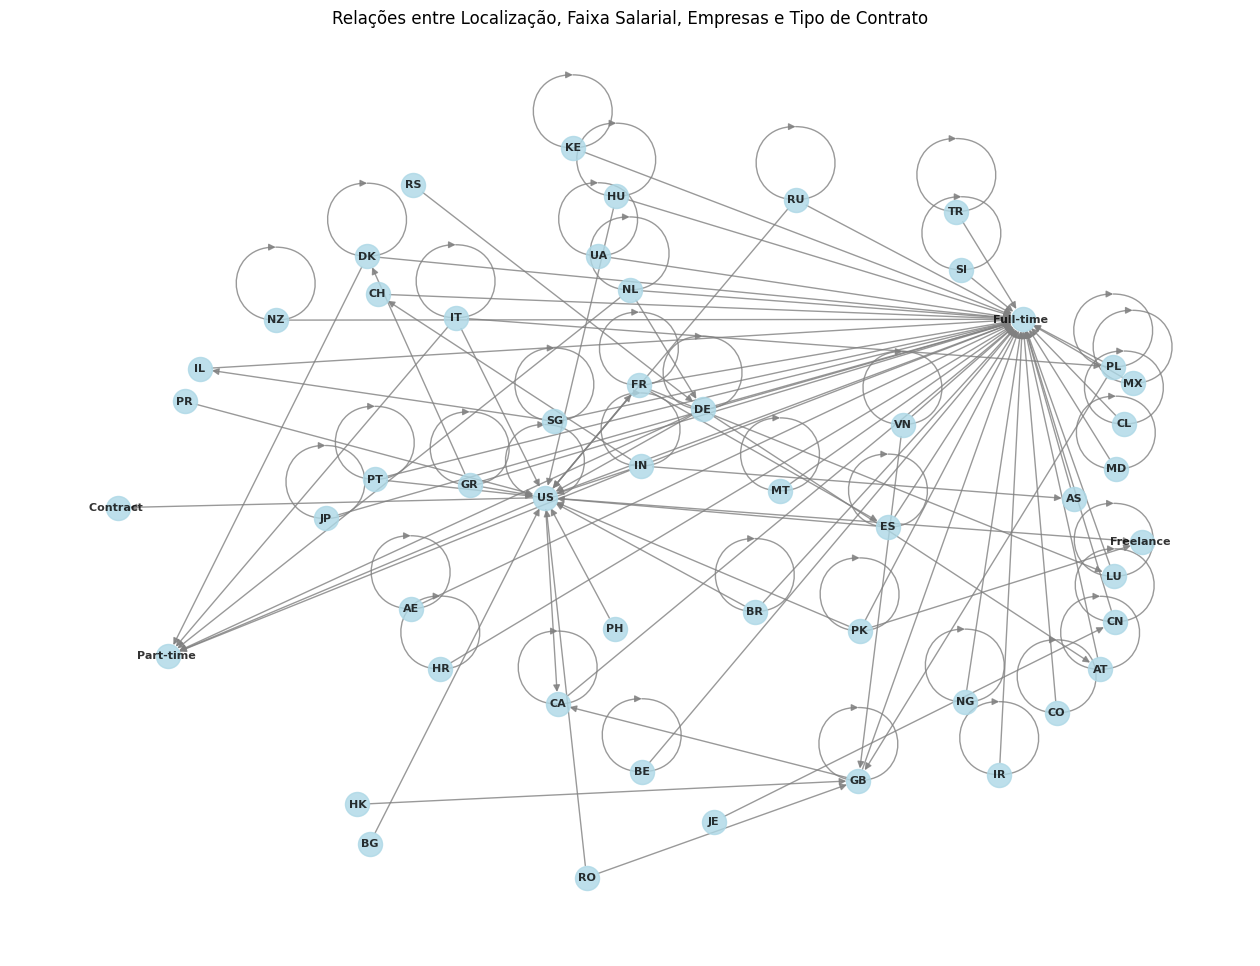

In [ ]:
# Construindo um grafo direcionado usando NetworkX
G = nx.DiGraph()

# Adicionando nós e arestas ao grafo com base nas relações desejadas
for index, row in serie.iterrows():
    # Adicionando nós e arestas para a relação entre localização e faixa salarial
    G.add_node(row['employee_residence'])
    G.add_node(row['company_location'])
    G.add_edge(row['employee_residence'], row['company_location'], salary=row['salary'])

    # Adicionando nós e arestas para a relação entre empresas e tipos de contrato
    G.add_node(row['company_location'])
    G.add_node(row['employment_type'])
    G.add_edge(row['company_location'], row['employment_type'])

# Visualizando o grafo
fig, ax = plt.subplots(figsize=(16, 12))  # Defina o tamanho da figura aqui
pos = nx.spring_layout(G, k=1.0, seed=42)  # Ajuste do parâmetro k para controlar a distância entre os nós
nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=300, node_color='lightblue', edge_color='gray', font_weight='bold', ax=ax, node_shape="o", alpha=0.8)
plt.title("Relações entre Localização, Faixa Salarial, Empresas e Tipo de Contrato")
plt.show()

# Restante do código permanece inalterado


In [ ]:
# Construindo um grafo direcionado usando NetworkX
G = nx.DiGraph()

# Adicionando nós e arestas ao grafo com base nas relações desejadas
for index, row in serie.iterrows():
    # Adicionando nós e arestas para a relação entre localização e faixa salarial
    G.add_node(row['employee_residence'])
    G.add_node(row['company_location'])
    G.add_edge(row['employee_residence'], row['company_location'], salary=row['salary'])

    # Adicionando nós e arestas para a relação entre empresas e tipos de contrato
    G.add_node(row['company_location'])
    G.add_node(row['employment_type'])
    G.add_edge(row['company_location'], row['employment_type'])


# Aplicando algoritmos de grafos
# Encontrando caminhos mais curtos entre nós
shortest_paths = nx.shortest_path(G)

# Encontrando clusters (componentes conectados)
clusters = list(nx.weakly_connected_components(G))

# Exibindo resultados
print("\nCaminhos mais curtos entre nós:")
for source, paths in shortest_paths.items():
    for target, path in paths.items():
        if source != target:
            print(f"{source} -> {target}: {path}")

print("\nClusters (Componentes Conectados):")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {cluster}")



Caminhos mais curtos entre nós:
DE -> Full-time : ['DE', 'Full-time ']
DE -> Part-time : ['DE', 'Part-time ']
DE -> US: ['DE', 'US']
DE -> AT: ['DE', 'AT']
DE -> Contract : ['DE', 'US', 'Contract ']
DE -> CA: ['DE', 'US', 'CA']
DE -> Freelance : ['DE', 'US', 'Freelance ']
DE -> FR: ['DE', 'US', 'FR']
DE -> ES: ['DE', 'US', 'FR', 'ES']
DE -> LU: ['DE', 'US', 'FR', 'LU']
GR -> US: ['GR', 'US']
GR -> DK: ['GR', 'DK']
GR -> Full-time : ['GR', 'Full-time ']
GR -> Part-time : ['GR', 'US', 'Part-time ']
GR -> Contract : ['GR', 'US', 'Contract ']
GR -> CA: ['GR', 'US', 'CA']
GR -> Freelance : ['GR', 'US', 'Freelance ']
GR -> FR: ['GR', 'US', 'FR']
GR -> ES: ['GR', 'US', 'FR', 'ES']
GR -> LU: ['GR', 'US', 'FR', 'LU']
US -> Full-time : ['US', 'Full-time ']
US -> Part-time : ['US', 'Part-time ']
US -> Contract : ['US', 'Contract ']
US -> CA: ['US', 'CA']
US -> Freelance : ['US', 'Freelance ']
US -> FR: ['US', 'FR']
US -> ES: ['US', 'FR', 'ES']
US -> LU: ['US', 'FR', 'LU']
RU -> Full-time : ['RU'

#Visualização de Dados:

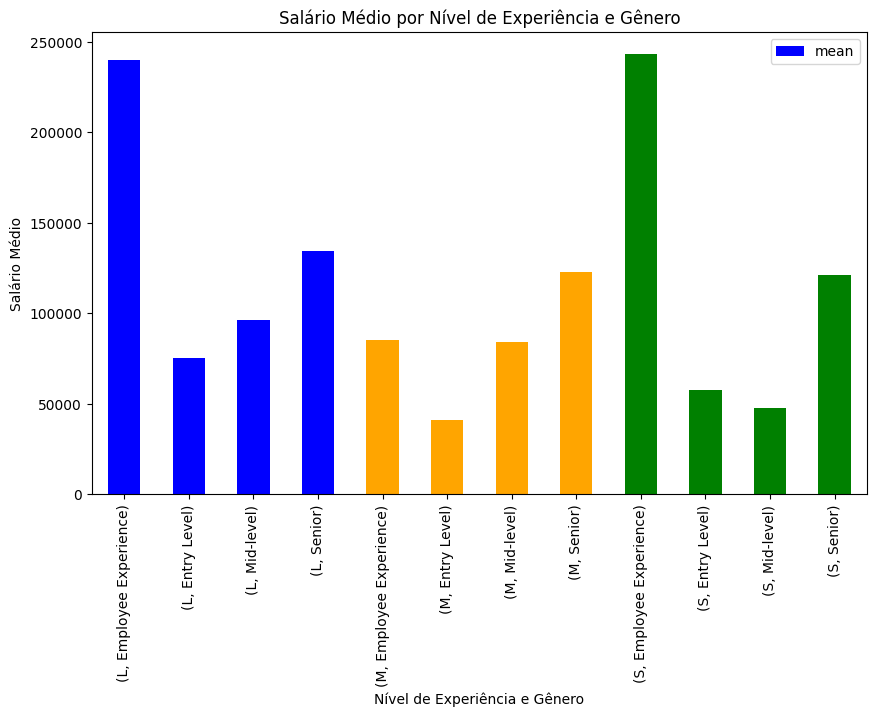

In [ ]:
data = {
    ('L', 'Employee Experience'): [8.0, 239729.875],
    ('L', 'Entry Level'): [19.0, 75148.0],
    ('L', 'Mid-level'): [62.0, 96285.451613],
    ('L', 'Senior'): [43.0, 134465.604651],
    ('M', 'Employee Experience'): [1.0, 85000.0],
    ('M', 'Entry Level'): [13.0, 41063.923077],
    ('M', 'Mid-level'): [25.0, 83982.8],
    ('M', 'Senior'): [16.0, 122572.125],
    ('S', 'Employee Experience'): [2.0, 243164.5],
    ('S', 'Entry Level'): [22.0, 57502.0],
    ('S', 'Mid-level'): [16.0, 47610.0],
    ('S', 'Senior'): [18.0, 120978.055556],
}

df = pd.DataFrame(data, index=['count', 'mean'])

# Transpor os dados para facilitar a plotagem
df = df.transpose()

# Plotar o gráfico de barras empilhadas
colors = {'L': 'blue', 'M': 'orange', 'S': 'green'}
df.plot(kind='bar', y='mean', stacked=True, color=[colors[x[0]] for x in df.index], figsize=(10, 6))
plt.title('Salário Médio por Nível de Experiência e Gênero')
plt.xlabel('Nível de Experiência e Gênero')
plt.ylabel('Salário Médio')


plt.show()


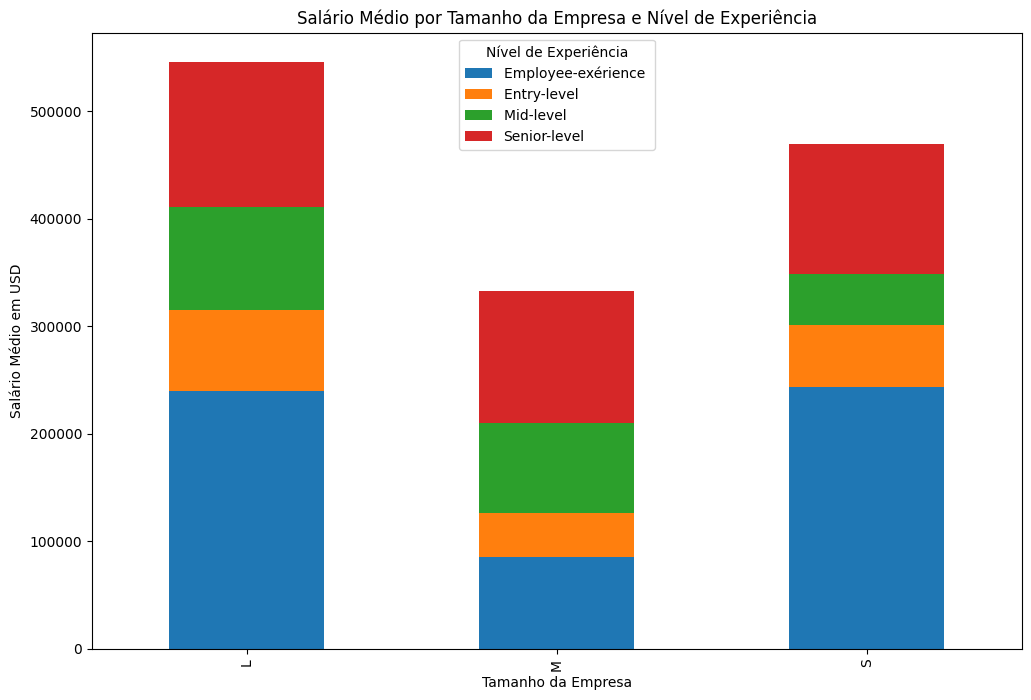

In [ ]:
# Agrupar os dados
grouped_data = serie.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Criar um DataFrame pivotado para facilitar a plotagem
pivot_data = grouped_data.pivot(index='company_size', columns='experience_level', values='salary_in_usd')

# Plotar o gráfico de barras empilhadas
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))

# Configurar rótulos e títulos
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Salário Médio em USD')
plt.title('Salário Médio por Tamanho da Empresa e Nível de Experiência')

# Adicionar legenda
plt.legend(title='Nível de Experiência')

# Exibir o gráfico
plt.show()

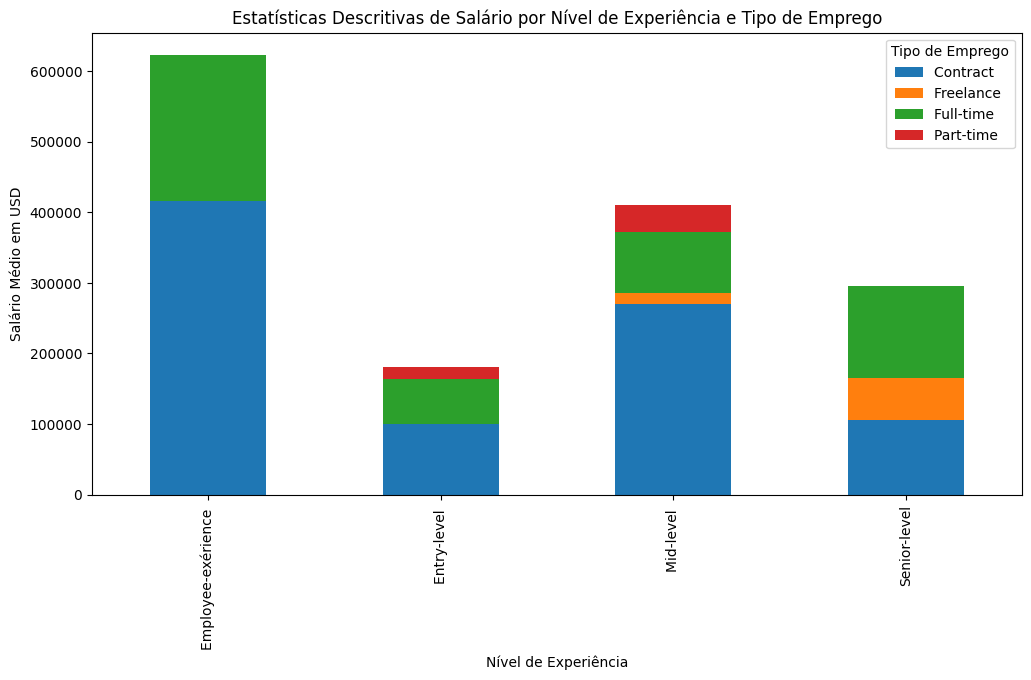

In [ ]:
# Agrupar e calcular estatísticas descritivas
grouped_data = serie.groupby(['experience_level', 'employment_type'])['salary_in_usd'].describe()

# Reorganizar os dados para facilitar a plotagem
grouped_data = grouped_data.unstack()

# Plotar gráfico de barras empilhadas
grouped_data['mean'].plot(kind='bar', stacked=True, figsize=(12, 6))

# Configurar rótulos e títulos
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio em USD')
plt.title('Estatísticas Descritivas de Salário por Nível de Experiência e Tipo de Emprego')
plt.legend(title='Tipo de Emprego')
plt.show()


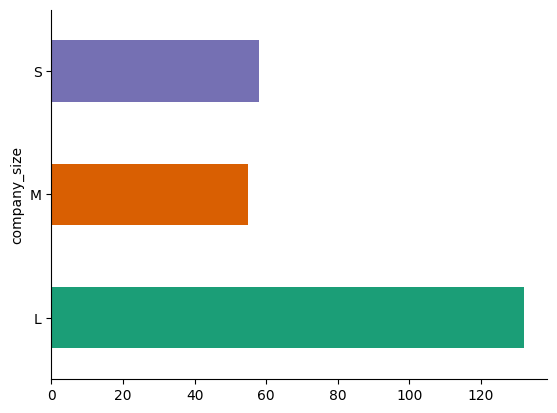

In [ ]:
# Agrupando o DataFrame 'serie' por 'company_size' e contando o número de ocorrências em cada grupo.
serie.groupby('company_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

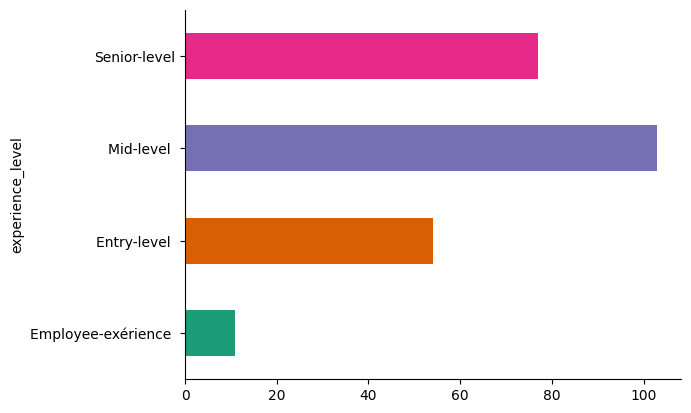

In [ ]:
# Agrupando o DataFrame 'serie' por 'experience_level' e contando o número de ocorrências em cada grupo.
serie.groupby('experience_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

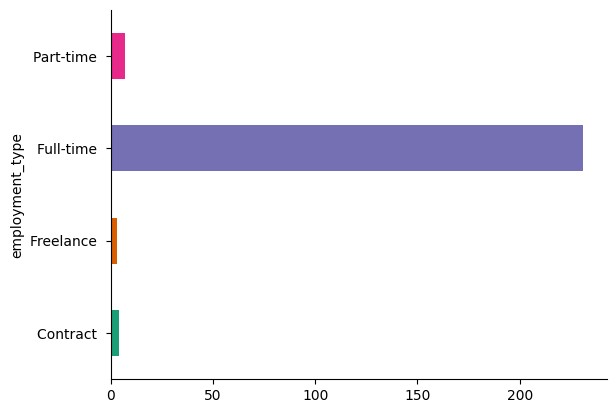

In [ ]:
# Agrupando o DataFrame 'serie' por 'employment_type' e contando o número de ocorrências em cada grupo.
serie.groupby('employment_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

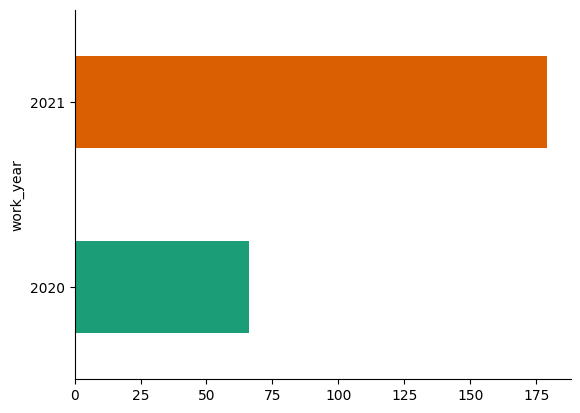

In [ ]:
# Agrupando o DataFrame 'serie' por 'work_year' e contando o número de ocorrências em cada grupo.
serie.groupby('work_year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

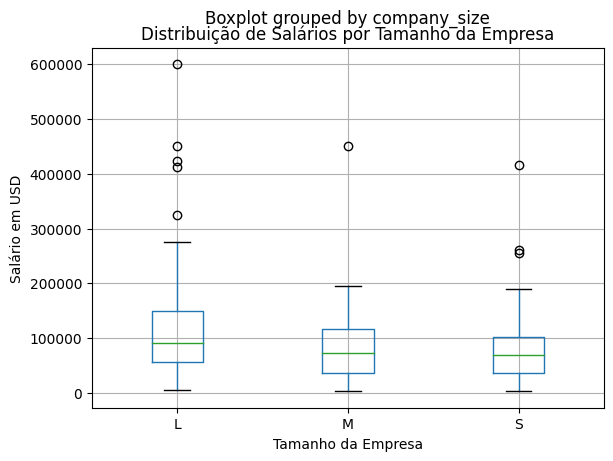

In [ ]:
# Criando um boxplot para visualizar a distribuição dos salários ('salary_in_usd') com base nos tamanhos das empresas ('company_size').
# O parâmetro 'column' especifica a coluna que contém os dados dos salários.
# O parâmetro 'by' especifica a coluna que será usada para categorizar os dados, neste caso, os tamanhos das empresas.
serie.boxplot(column='salary_in_usd', by='company_size')

# Adicionando um título ao gráfico.
plt.title('Distribuição de Salários por Tamanho da Empresa')

# Adicionando rótulos aos eixos x e y.
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Salário em USD')

# Exibindo o gráfico.
plt.show()

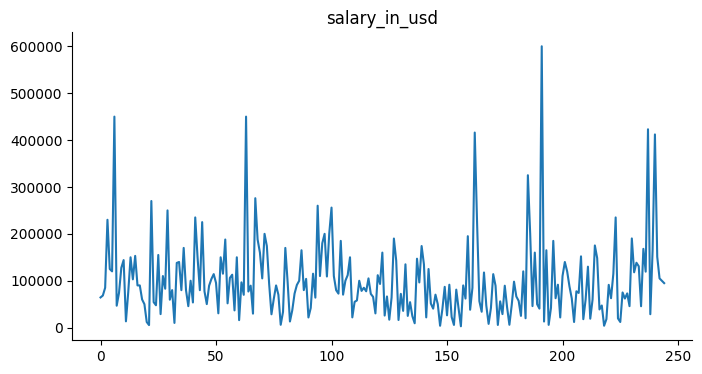

In [ ]:
# Criando um gráfico de linha para visualizar a variação dos salários em dólares ('salary_in_usd') ao longo do índice ou período.
serie['salary_in_usd'].plot(kind='line', figsize=(8, 4), title='salary_in_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

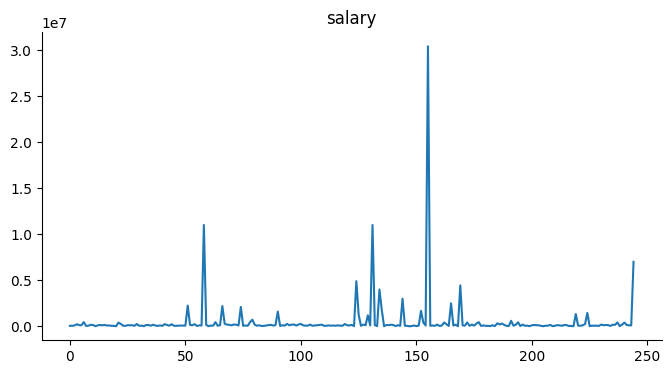

In [ ]:
# Criando um gráfico de linha para visualizar a variação dos salários ('salary') ao longo do índice ou período.
serie['salary'].plot(kind='line', figsize=(8, 4), title='salary')
plt.gca().spines[['top', 'right']].set_visible(False)

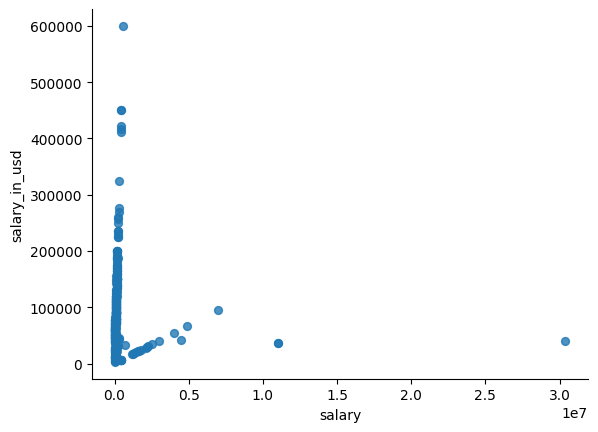

In [ ]:
# Criando um gráfico de dispersão (scatter plot) para visualizar a relação entre duas variáveis: 'salary' no eixo x e 'salary_in_usd' no eixo y.
serie.plot(kind='scatter', x='salary', y='salary_in_usd', s=32, alpha=.8)

plt.gca().spines[['top', 'right']].set_visible(False)

# Exibindo o gráfico.
plt.show()


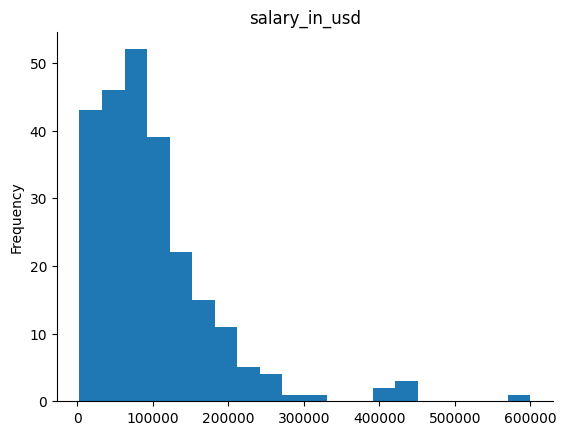

In [ ]:
# Criando um histograma para visualizar a distribuição da coluna 'salary_in_usd'.
serie['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

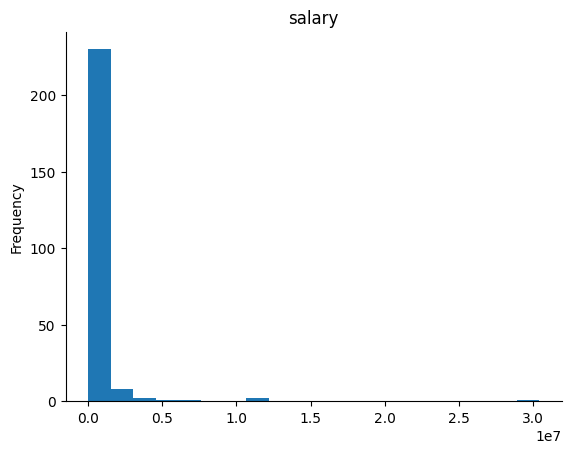

In [ ]:
# Criando um histograma para visualizar a distribuição da coluna 'salary'.
serie['salary'].plot(kind='hist', bins=20, title='salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

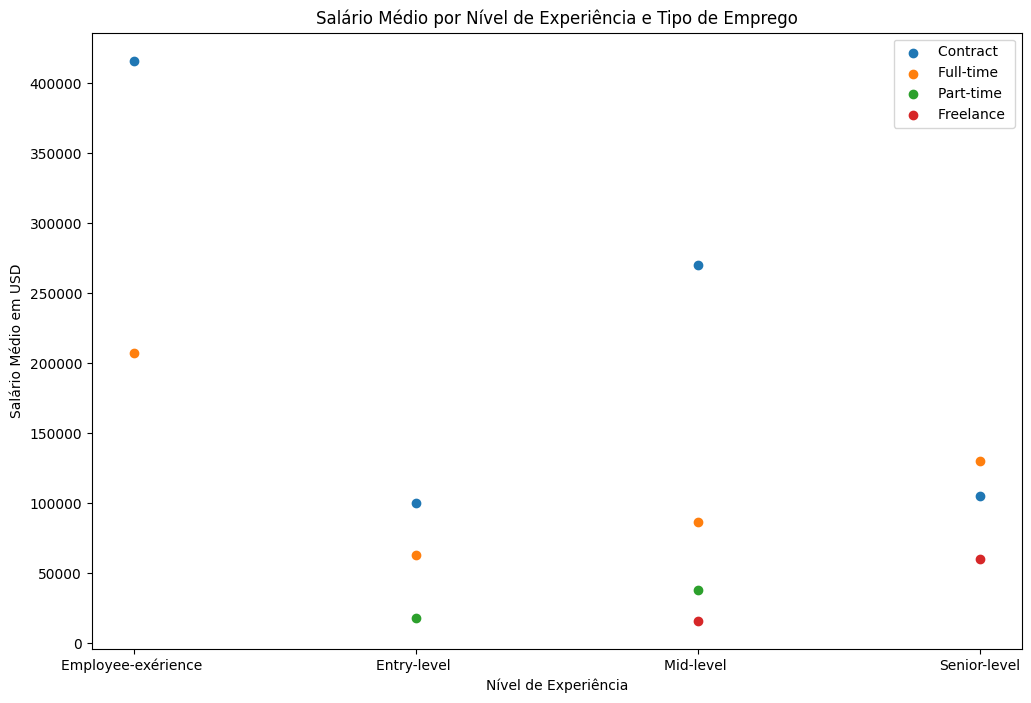

In [ ]:
# Agrupar os dados
grouped_data = serie.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Criar um gráfico de dispersão
plt.figure(figsize=(12, 8))

# Iterar sobre cada tipo de emprego e plotar os pontos
for employment_type in grouped_data['employment_type'].unique():
    subset = grouped_data[grouped_data['employment_type'] == employment_type]
    plt.scatter(subset['experience_level'], subset['salary_in_usd'], label=employment_type)

# Configurar rótulos e títulos
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio em USD')
plt.title('Salário Médio por Nível de Experiência e Tipo de Emprego')
plt.legend()
plt.show()
